In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("bigdatamart_Train.csv")
test = pd.read_csv("bigdatamart_Test.csv")
train['source']='train'
test['source']='test'
df = pd.concat([train,test],ignore_index=True) #join train and test data

In [3]:
print(train.shape)
train.head()

(8523, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:
print(test.shape)
test.head()

(5681, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [5]:
print(df.shape)
df.head()

(14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Categoricalm Irregularity found in name of Item Fat Content column

In [7]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [8]:
df["Item_Visibility"].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In item visibility attribute 879 values are zero. 

In [9]:
df["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [10]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In our data 3 types of outlet size present.

In [11]:
df["Outlet_Location_Type"].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [12]:
#find null value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Two columns have null value, which is  Item_Weight and Outlet_Size. Here, we ignor Item_Outlet_Sales because it is our target variable and null value present in test data.

In [13]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDY08,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


In [14]:
# Item_Visibility column null value filled with it's mean value.  
df["Item_Visibility"] = df["Item_Visibility"].replace(0,df["Item_Visibility"].mean())
df["Item_Visibility"].value_counts()

0.065953    879
0.076841      3
0.077290      3
0.077169      3
0.076792      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.115072      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [15]:
# Give the right name of categorical data to cope up with confusion.
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [16]:
#Here, we filled Item_Weight column with it's mean value and Outlet_Size column with it's mode value.
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode().iloc[0])

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
#Convert Outlet Establishment Year into total year and drop Outlet Establishment Year column.
df["total_year"] = 2013- df["Outlet_Establishment_Year"]
df.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Weight           14204 non-null  float64
 2   Item_Fat_Content      14204 non-null  object 
 3   Item_Visibility       14204 non-null  float64
 4   Item_Type             14204 non-null  object 
 5   Item_MRP              14204 non-null  float64
 6   Outlet_Identifier     14204 non-null  object 
 7   Outlet_Size           14204 non-null  object 
 8   Outlet_Location_Type  14204 non-null  object 
 9   Outlet_Type           14204 non-null  object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  source                14204 non-null  object 
 12  total_year            14204 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [20]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,total_year
count,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.070034,141.004977,2181.288914,15.169319
std,4.234226,0.048602,62.086938,1706.499616,8.371664
min,4.555000,0.003575,31.290000,33.290000,4.000000
25%,9.300000,0.033143,94.012000,834.247400,9.000000
50%,12.792854,0.062347,142.247000,1794.331000,14.000000
75%,16.000000,0.094037,185.855600,3101.296400,26.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000


There is much more differance between columns mean and columns standerd deviation.
It shows the skewness present in data and we need to remove it.

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

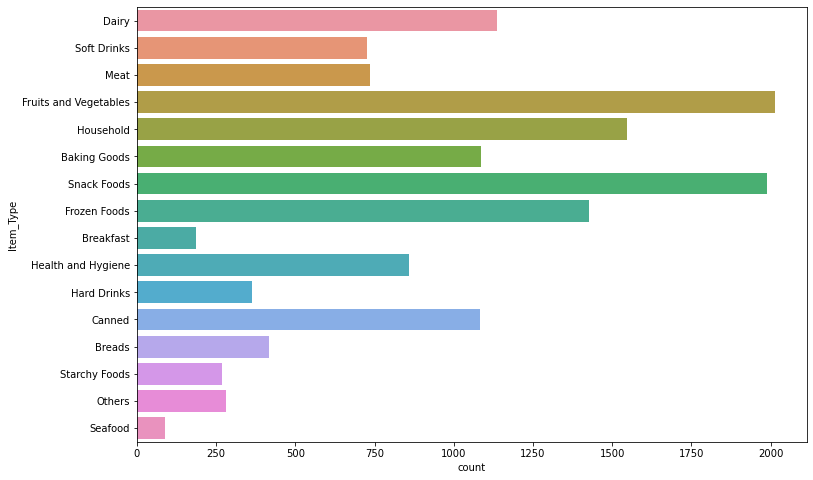

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(y="Item_Type",orient="h",data=df)

In our data total 16 types of items are present. In which, Fruits,Vegetables and Snack food have highest quantity compared to other items type. While,Seafood are least in quantity.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

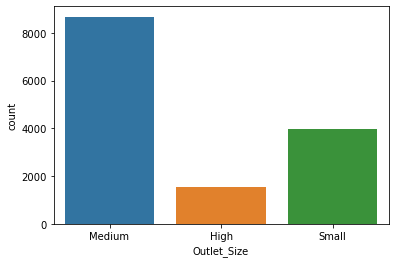

In [22]:
sns.countplot("Outlet_Size",data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

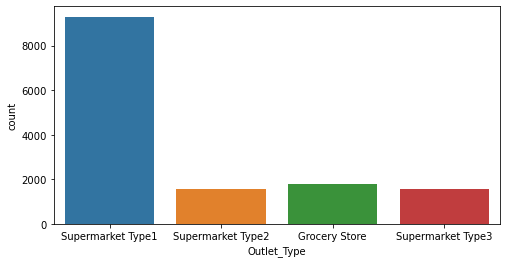

In [23]:
plt.figure(figsize=(8,4))
sns.countplot("Outlet_Type",data=df)

In [24]:
# split data of train and test from our main modified dataset(df)
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

<AxesSubplot:>

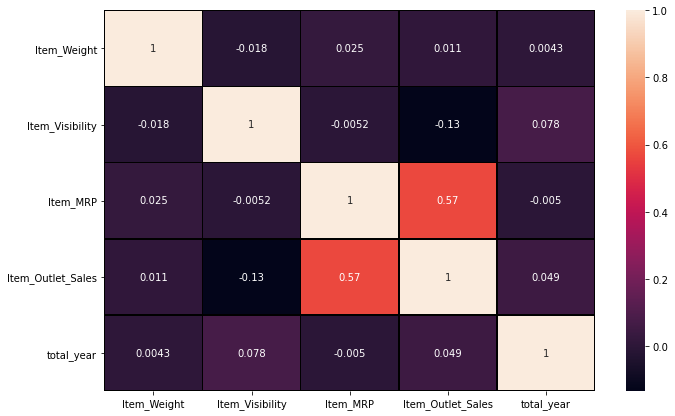

In [25]:
plt.figure(figsize=(11,7))
sns.heatmap(train.corr(),annot = True,linewidth=0.7,linecolor="black")

Item_Outlet_Sales(target varieble) have good positive correlation with Item outlet sales.while slightly negative correlation with item visibility and total year.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

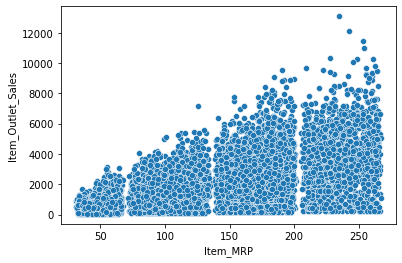

In [26]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=train)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

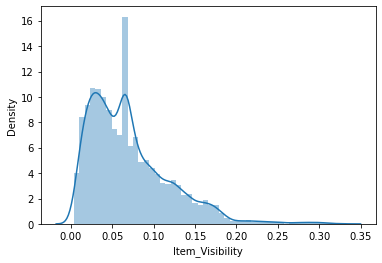

In [27]:
#checking skewness of Item visibility
sns.distplot(df["Item_Visibility"])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

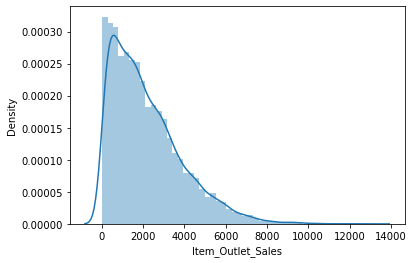

In [28]:
#checking skewness of Item Outlet Sales
sns.distplot(df["Item_Outlet_Sales"])

In above both plot showing skewness in data.so, we need to remove it.

In [29]:
# drop source columns because it is used only for split data in train and test. 
test.drop(["Item_Outlet_Sales","source"],axis=1,inplace=True)
train.drop(["source"],axis=1,inplace=True)

In [30]:
#apply label encoder for convert high number of categorical data into numerical data in train and test data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["Item_Identifier"] = le.fit_transform(train["Item_Identifier"])
train["Item_Type"] = le.fit_transform(train["Item_Type"])
train["Outlet_Identifier"] = le.fit_transform(train["Outlet_Identifier"])

test["Item_Identifier"] = le.fit_transform(test["Item_Identifier"])
test["Item_Type"] = le.fit_transform(test["Item_Type"])
test["Outlet_Identifier"] = le.fit_transform(test["Outlet_Identifier"])

In [31]:
# apply get_dummies method where low number of categorical data present in columns. 
# Which is converted into binary data and produce different columns for every category.   
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [32]:
print(train.shape)
print(test.shape)

(8523, 16)
(5681, 15)


In [33]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,total_year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,3735.1380,14,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,443.4228,4,1,1,0,0,1,0,1,0
2,662,17.50,0.016760,10,141.6180,9,2097.2700,14,0,1,0,0,0,1,0,0
3,1121,19.20,0.065953,6,182.0950,0,732.3800,15,1,1,0,0,1,0,0,0
4,1297,8.93,0.065953,9,53.8614,1,994.7052,26,0,0,0,0,1,1,0,0


In [34]:
x = train.drop(["Item_Outlet_Sales"],axis=1)
y = train["Item_Outlet_Sales"]

In [35]:
#remove skewness from train and test data
from sklearn.preprocessing import power_transform
x = power_transform(x,method="yeo-johnson")
test = power_transform(test,method="yeo-johnson")

In [36]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [38]:
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print("r2_score:",r2_score(y_test,predlr))
print("mean squared error", mean_squared_error(y_test,predlr))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,predlr)))

r2_score: 0.5780700540659569
mean squared error 1146792.963257941
root mean squared error 1070.8841969409862


In [39]:
#finding best parameters using GridSearchCV.
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls = Lasso()
reg = GridSearchCV(ls,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [40]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print("r2_score:",r2_score(y_test,pred_ls))
print("mean squared error", mean_squared_error(y_test,pred_ls))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_ls)))

r2_score: 0.5780816283659993
mean squared error 1146761.5046568837
root mean squared error 1070.8695086969672


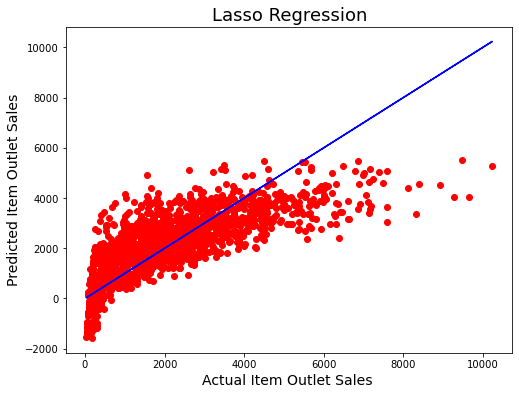

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Item Outlet Sales ",fontsize=14)
plt.ylabel("Predicted Item Outlet Sales",fontsize=14)
plt.title("Lasso Regression",fontsize=18)
plt.show()

In [42]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'random_state':list(range(0,100))}
rg = Ridge()
reg = GridSearchCV(rg,parameters)
reg.fit(x_train,y_train)

print(reg.best_params_)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0}


In [43]:
rg = Ridge(alpha=1, copy_X=True, fit_intercept=True, normalize=True, random_state=0, tol=0.001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
pred_rg=rg.predict(x_test)
print("r2_score:",r2_score(y_test,pred_rg))
print("mean squared error", mean_squared_error(y_test,pred_rg))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_rg)))

r2_score: 0.388266032830591
mean squared error 1662674.6114991505
root mean squared error 1289.4474054800182


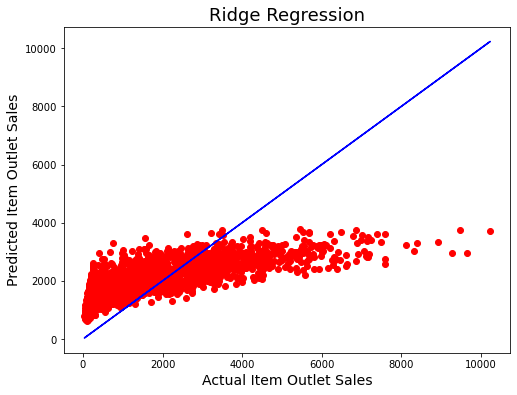

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rg, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel("Actual Item Outlet Sales",fontsize=14)
plt.ylabel("Predicted Item Outlet Sales",fontsize=14)
plt.title("Ridge Regression",fontsize=18)
plt.show()

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
print("r2_score:",r2_score(y_test,pred_dtr))
print("mean squared error", mean_squared_error(y_test,pred_dtr))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score: 0.0908028387422789
mean squared error 2471170.668951383
root mean squared error 1571.995759838869


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [47]:
#Bagging method
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random=rf.predict(x_test)
print("r2_score:",r2_score(y_test,pred_random))
print("mean squared error", mean_squared_error(y_test,pred_random))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_random)))

r2_score: 0.5625376252092702
mean squared error 1189009.6399522691
root mean squared error 1090.417186196306


In [48]:
#boosting method
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss':['ls','lad','huber','quntile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 50}


In [55]:
gbr = GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=50)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_random=gbr.predict(x_test)
print("r2_score:",r2_score(y_test,pred_random))
print("mean squared error", mean_squared_error(y_test,pred_random))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_random)))

r2_score: 0.6080851660790796
mean squared error 1065212.7872601256
root mean squared error 1032.0914626427862


In [50]:
#!pip install xgboost
import xgboost as xgb

In [51]:
xg = xgb.XGBRegressor()
xg.fit(x_train,y_train)
pred_xg = xg.predict(x_test)
print("r2_score:",r2_score(y_test,pred_xg))
print("mean squared error", mean_squared_error(y_test,pred_xg))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,pred_xg)))

r2_score: 0.5460698500245771
mean squared error 1233768.559968039
root mean squared error 1110.7513492983203


In [52]:
from sklearn.linear_model import ElasticNet
enr = ElasticNet(alpha = 0.01)
enr.fit(x_train,y_train)
enrpred = enr.predict(x_test)
print("r2_score:",r2_score(y_test,enrpred))
print("mean squared error", mean_squared_error(y_test,enrpred))
print("root mean squared error", np.sqrt(mean_squared_error(y_test,enrpred)))

r2_score: 0.5777825598232604
mean squared error 1147574.3640039146
root mean squared error 1071.2489738636461


In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
accuracy = cross_val_score(gbr,x,y,cv = 10,scoring="r2")
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.59596144 0.61223144 0.56581461 0.60307247 0.5389301  0.60727316
 0.61889017 0.58769865 0.6288148  0.57661508]
Accuracy of Model with Cross Validation is: 59.35301931771397


we apply different models with different regularization technique,hyperparameter tuning,bagging and boosting technique.
After applying different models and techniques we get good r2_score,mean squared error,root mean squared error using GradientBoostingRegressor.

In [58]:
import joblib
joblib.dump(gbr,"BigdatamartsalesProject.obj")

['BigdatamartsalesProject.obj']